# Lab 3: T Cell Differentiation

In [4]:
# imports
from datascience import Table
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from IPython.display import Markdown as md

/srv/app/venv/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Part 1
This lab, as well as following labs, will use the datascience API. For more information about the datascience Table API, see http://data8.org/datascience/tutorial.html#getting-started.

For part 1 of the lab, we will investigate the expression of 24923 genes in CD8+ T cells over time.

These mice were injected with naive T cells that have a T cell receptor (TCR) which is specific for an epitope from the ovalbumin (ov) protein. These mice were then were infected with two different viruses: vesicular stomatitis virus (VSV) and listeria bacterium (LisOva).

VSV infected mice were sampled over 106 days. Lis infected mice were sampled over 100 days. These time points demonstrate differentiation in expression of genes as the CD8+ T Cells are introduced the the ov epitope after infection.

This data is from the Immgen database, and can be can be explored at the [Immgen Population Comparison](http://rstats.immgen.org/PopulationComparison/). This dataset was downloaded from [ImmGen DataRequest](http://rstats.immgen.org/DataRequest/) for activated T cells.

## Load in the Data

1. First, load in the data for containing T Cell expression using the read_table function.

In [5]:
# load in data for part 1
table1 = Table.read_table('https://raw.githubusercontent.com/data-8/mcb-88-connector/gh-pages/data/lab3/rnaseq_Tcell_quantifications.csv')
table1

ProbeSetID,GeneSymbol,Description,T_8Nve_Sp_OT1,T_8Eff_Sp_OT1_d5_VSVOva,T_8Eff_Sp_OT1_d6_VSVOva,T_8Eff_Sp_OT1_d8_VSVOva,T_8Eff_Sp_OT1_d15_VSVOva,T_8Mem_Sp_OT1_d45_VSVOva,T_8Mem_Sp_OT1_d106_VSVOva,T_8Eff_Sp_OT1_12hr_LisOva,T_8Eff_Sp_OT1_24hr_LisOva,T_8Eff_Sp_OT1_48hr_LisOva,T_8Eff_Sp_OT1_d6_LisOva,T_8Eff_Sp_OT1_d8_LisOva,T_8Eff_Sp_OT1_d10_LisOva,T_8Eff_Sp_OT1_d15_LisOva,T_8Mem_Sp_OT1_d45_LisOva,T_8Mem_Sp_OT1_d100_LisOva
10344620,Gm10568,predicted gene 10568,17.1066,15.2134,16.1687,18.3247,18.4808,17.1266,17.2547,15.4919,17.4334,15.8074,18.1414,20.4086,18.6309,17.7465,14.0495,15.1544
10344622,Gm10568,predicted gene 10568,310.79,246.054,232.078,262.501,284.436,251.487,307.685,303.883,320.485,475.209,275.023,259.291,302.312,217.506,249.44,287.275
10344624,Lypla1,lysophospholipase 1,516.851,642.906,438.234,336.047,213.322,327.039,253.454,597.673,678.466,780.735,745.074,463.95,393.953,341.124,462.903,391.016
10344633,Tcea1,transcription elongation factor A (SII) 1,657.929,1128.72,937.971,783.696,723.474,844.218,975.749,842.74,935.525,1167.71,990.534,852.897,862.77,850.499,766.995,686.519
10344637,Atp6v1h,ATPase H+ transporting lysosomal V1 subunit H,258.565,271.917,196.91,204.652,140.238,221.026,187.96,239.804,293.867,321.674,254.231,218.453,198.944,215.98,244.8,232.754
10344653,Oprk1,opioid receptor kappa 1,13.8118,16.823,20.0322,24.1092,26.5062,18.8644,20.0481,16.4834,16.762,17.0419,15.737,17.7592,18.6077,20.1285,18.4554,17.1098
10344658,Rb1cc1,RB1-inducible coiled-coil 1,321.48,211.864,206.51,261.817,184.712,269.507,182.116,116.314,141.272,110.904,288.695,301.651,318.267,221.695,240.517,204.084
10344674,Fam150a,family with sequence similarity 150 member A,9.80566,10.4646,10.4375,10.4173,14.7071,10.4059,11.0453,10.2226,10.8312,8.70721,9.58962,12.4688,13.4258,12.5919,12.3598,10.3268
10344679,St18,suppression of tumorigenicity 18,42.7689,42.072,53.3134,44.3263,53.9271,41.2916,50.0826,36.4488,32.8533,41.727,41.4922,46.9989,44.7015,50.0333,40.1597,44.4181
10344707,Pcmtd1,protein-L-isoaspartate (D-aspartate) O-methyltransferase ...,396.905,181.392,258.147,329.725,241.175,338.861,343.022,109.367,121.253,83.4858,251.369,297.788,348.985,284.373,310.145,347.757


### What do the table headers mean?
For each gene, we are given a gene symbol and description. We are also given a value for each time point in each cell type. These values are drawn from microarray experiments, and measure the flourescence of hybridization of each gene to a probe. The higher the measure of flourescence, the greater the expression of RNA at that probe. Note that all probes are specific to a given gene.

The data loaded in shows 24923 probes and their expression over 100 days of incubation. 

First, let's sort the genes by naive expression. First, we will sort in order of descending expression to find the 3 highest expressed genes.

In [6]:
# First, select the Gene symbol and mean expression columns
expression = table1.select(['GeneSymbol', 'T_8Nve_Sp_OT1'])

# Next, sort by mean expression. Set descending to true.
sortedDescending = expression.sort('T_8Nve_Sp_OT1', descending = True)

# Select the top expressed genes
sortedDescending

GeneSymbol,T_8Nve_Sp_OT1
LOC236598,21279.1
Rn18s,17785.1
Eef1a1,12877.6
COX1,12718.2
Rn7sk,12380.2
Actb,12230.9
CYTB,10735.6
Rplp0,10645.2
ND2,10488.8
Rps27,10358.3


Here, we see the highest expressed genes are LOC236598, Rn18s, and Eef1a1.


<h2 style="color:red">** Question 1**</h2> 

Using the **sort()** functionality for table, what are the top 3 expressed genes and their expression values for late memory cells (days = 106) infected with VSVOva? 


In [7]:
# Answer here:


<h2 style="color:red">** Question 2**</h2> 
Using the **sort()** functionality for table, what are the top 3 expressed genes and their expression values for late effector cells (days = 8) infected with VSVOva? 

In [8]:
# Answer here


<h2 style="color:red">** Question 3**</h2> 
Is there any overlap between the most highly expressed genes in naive, effector and memory? What does it mean if there are genes highly expressed in all three groups? 

Answer:


<h2 style="color:red">** Question 4**</h2> 
Is there any differentially expressed genes in naive, effector and memory? What does it mean if there are differentially expressed genes across categories?

Answer:


# Part 2: K Means Clustering of Microarray Probe Intensities

For part 2 of the lab, we will cluster genes based on their gene specific probe intensities over 100 days. The goal of this exercise is to find relationships among genes using k-means clustering, a common machine-learning technique for unsupervised learning.

For the curious: A description of k-means clustering can be found here: http://stanford.edu/~cpiech/cs221/handouts/kmeans.html A more python-focused implementation of k-means can be found here: https://mubaris.com/2017/10/01/kmeans-clustering-in-python/

In short, k-means clustering is a method to group a dataset. Using an iterative algorithm, k-means can identify relationships between seemingly disparate data points and deeper patterns than predicted by theory. Rather than implementing our own k-means algorithm(which can take quite some time), we will use someone else's! As it is much more likely to be developed, optimized, and tested, we can build off of other's work while saving time ourselves.

In particular, we will be using the sklearn implementation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html/ Sklearn is an excellent data science and modelling package in Python and can run just about any model one could desire(besides neural networks), all of which follow a simple, easy-to-understand API.


First, we will load in the data for a subset of the probes. We will use these to filter our original dataset.

In [9]:
# load in a list of probe IDs we are interested in clustering
fileProbes = Table.read_table('https://raw.githubusercontent.com/data-8/mcb-88-connector/gh-pages/data/lab3/cluster_probes.csv')

# get the probe IDs from the table and convert to a list
filteredProbes = list(fileProbes.to_df().columns)
filteredProbes = list(map(int, filteredProbes))
filteredProbes

[10357488,
 10475502,
 10410530,
 10472860,
 10388488,
 10577226,
 10589654,
 10444284,
 10422321,
 10375019,
 10538408,
 10509122,
 10606654,
 10530503,
 10369702,
 10373740,
 10401244,
 10360684,
 10499655,
 10498599,
 10382532,
 10371356,
 10585099,
 10506254,
 10583242,
 10362861,
 10381096,
 10354111,
 10359689,
 10396079,
 10357604,
 10393559,
 10431935,
 10599348,
 10434869,
 10359982,
 10384458,
 10548585,
 10390328,
 10360173,
 10389231,
 10366586,
 10420308,
 10346790,
 10497878,
 10469278]

In [10]:
# filter the data with the selected gene symbols
allProbes = table1["ProbeSetID"].tolist() 

# make empty list to hold booleans for geneSymbols
bools = list(range(len(allProbes)))

# assign bools to whether or not gene symbol was found
# in our filtered list geneSymbols
for index, i in enumerate(allProbes):
    if i in filteredProbes:
        bools[index] = True
    else:
        bools[index] = False

# filter table by geneSymbol booleans        
table2 = table1.where(bools)
table2

ProbeSetID,GeneSymbol,Description,T_8Nve_Sp_OT1,T_8Eff_Sp_OT1_d5_VSVOva,T_8Eff_Sp_OT1_d6_VSVOva,T_8Eff_Sp_OT1_d8_VSVOva,T_8Eff_Sp_OT1_d15_VSVOva,T_8Mem_Sp_OT1_d45_VSVOva,T_8Mem_Sp_OT1_d106_VSVOva,T_8Eff_Sp_OT1_12hr_LisOva,T_8Eff_Sp_OT1_24hr_LisOva,T_8Eff_Sp_OT1_48hr_LisOva,T_8Eff_Sp_OT1_d6_LisOva,T_8Eff_Sp_OT1_d8_LisOva,T_8Eff_Sp_OT1_d10_LisOva,T_8Eff_Sp_OT1_d15_LisOva,T_8Mem_Sp_OT1_d45_LisOva,T_8Mem_Sp_OT1_d100_LisOva
10346790,Ctla4,cytotoxic T-lymphocyte-associated protein 4,40.5137,189.618,174.671,102.741,86.5477,91.6986,122.271,578.276,204.68,216.976,79.171,51.5743,53.3285,50.6986,51.6566,47.2985
10354111,Aff3,AF4/FMR2 family member 3,727.418,347.241,405.319,487.075,370.855,505.344,431.484,253.564,274.36,216.846,222.445,263.373,308.042,264.899,250.192,385.8
10357488,Cd55,CD55 antigen,411.879,80.4365,69.534,97.8713,99.0481,128.665,101.618,43.5601,53.2845,23.6003,77.9723,47.4656,55.892,53.7361,89.1314,157.413
10357604,Ikbke,inhibitor of kappaB kinase epsilon,1217.5,398.096,524.399,661.383,520.588,728.136,637.862,462.953,446.397,206.132,421.266,424.839,504.605,417.514,478.28,559.194
10359689,Atp1b1,ATPase Na+/K+ transporting beta 1 polypeptide,738.161,91.4169,70.3993,67.2544,55.8473,52.9479,62.9576,261.71,332.594,197.892,55.3096,54.5973,45.9407,48.013,39.5709,43.4818
10359982,Atf6,activating transcription factor 6,128.109,388.839,303.594,333.833,243.47,361.815,305.731,399.749,313.168,419.109,499.304,395.725,400.976,364.139,447.81,384.966
10360173,Slamf7,SLAM family member 7,74.4931,1248.22,1218.33,1162.19,819.423,1002.4,814.314,1079.77,678.279,346.417,1561.75,1525.5,1416.03,1180.46,1125.86,1171.5
10360684,Ephx1,epoxide hydrolase 1 microsomal,1071.37,94.979,99.8833,86.2465,85.5341,94.0486,81.0468,301.142,286.555,147.103,84.1156,105.661,89.9623,88.8836,88.2345,74.2489
10362861,Scml4,sex comb on midleg-like 4 (Drosophila),1232.57,260.105,435.827,588.251,496.482,688.84,530.535,419.639,437.042,216.496,324.392,455.093,522.295,437.58,583.793,658.293
10366586,Ifng,interferon gamma,36.259,110.026,113.561,107.297,111.521,175.386,268.082,4780.33,2942.41,167.292,218.971,142.85,177.332,139.17,282.368,116.539


Fit 10 clusters to the all genes available in our dataset. You first must convert the dataframe into an np matrix. To do so, select relevant columns, then call `table.to_df().as_matrix()`.

In [11]:
# Select the expression columns for 0 to 100 days
columns = table2.select(['T_8Nve_Sp_OT1', 'T_8Eff_Sp_OT1_d5_VSVOva', 'T_8Eff_Sp_OT1_d6_VSVOva', \
                         'T_8Eff_Sp_OT1_d8_VSVOva', 'T_8Eff_Sp_OT1_d15_VSVOva', 'T_8Mem_Sp_OT1_d45_VSVOva', \
                         'T_8Mem_Sp_OT1_d106_VSVOva'])

# To use kmeans, we must format our data as a matrix. These functions let us extract a matrix of values from our table 
# of expression data.
matrix = columns.to_df().as_matrix()

# Run kmeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(matrix)

# Print out the cluster labels. Each label 0-9 represents a different cluster. Genes in the same cluster should have 
#'similar' expression patterns. 
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[0 2 0 2 5 8 4 5 2 0 0 0 2 5 5 0 1 5 8 6 0 0 7 0 3 0 0 9 0 0 5 5 0 0 2 0 0
 0 0 4 0 2 5 0 0 0]


Now, we will plot time series data for cluster 1 over time from 0 to 100 days of incubation.

In [12]:
# Add a new column to our table that holds the cluster label kmeans assigned.
columns_and_labels = columns.with_column('cluster_id', kmeans.labels_.tolist())

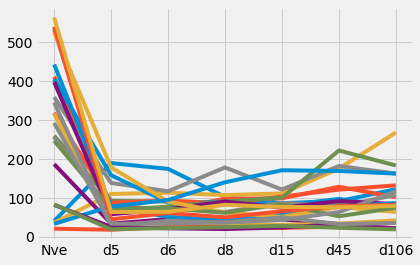

In [13]:
# Get genes that were clustered into cluster 0. Drop the cluster column for plotting.
cluster_0 = columns_and_labels.where('cluster_id', 0).drop('cluster_id')

# get figure and axes for plot
fig, ax = plt.subplots()

# Graphing a line for each gene is tricky. To do this, we will be converting our data to a matrix, 
# then using matplotlib. 'T' transposes our data.
x=cluster_0.to_df().as_matrix().T

# Plot each gene using matplotlib.
results = ax.plot(x)

# set labels to incubation days
labels = ['', 'Nve', 'd5', 'd6', 'd8', 'd15', 'd45', 'd106']
# rewrite labels
ax.set_xticklabels(labels)


<h2 style="color:red">** Question 5**</h2> 
Following the instructions from the cell above, plot all of the 10 clusters on a subplot. (Hint: you should use a loop so you don't have to re-write code 9 times.) **Make sure to label and title your plots for full credit.**

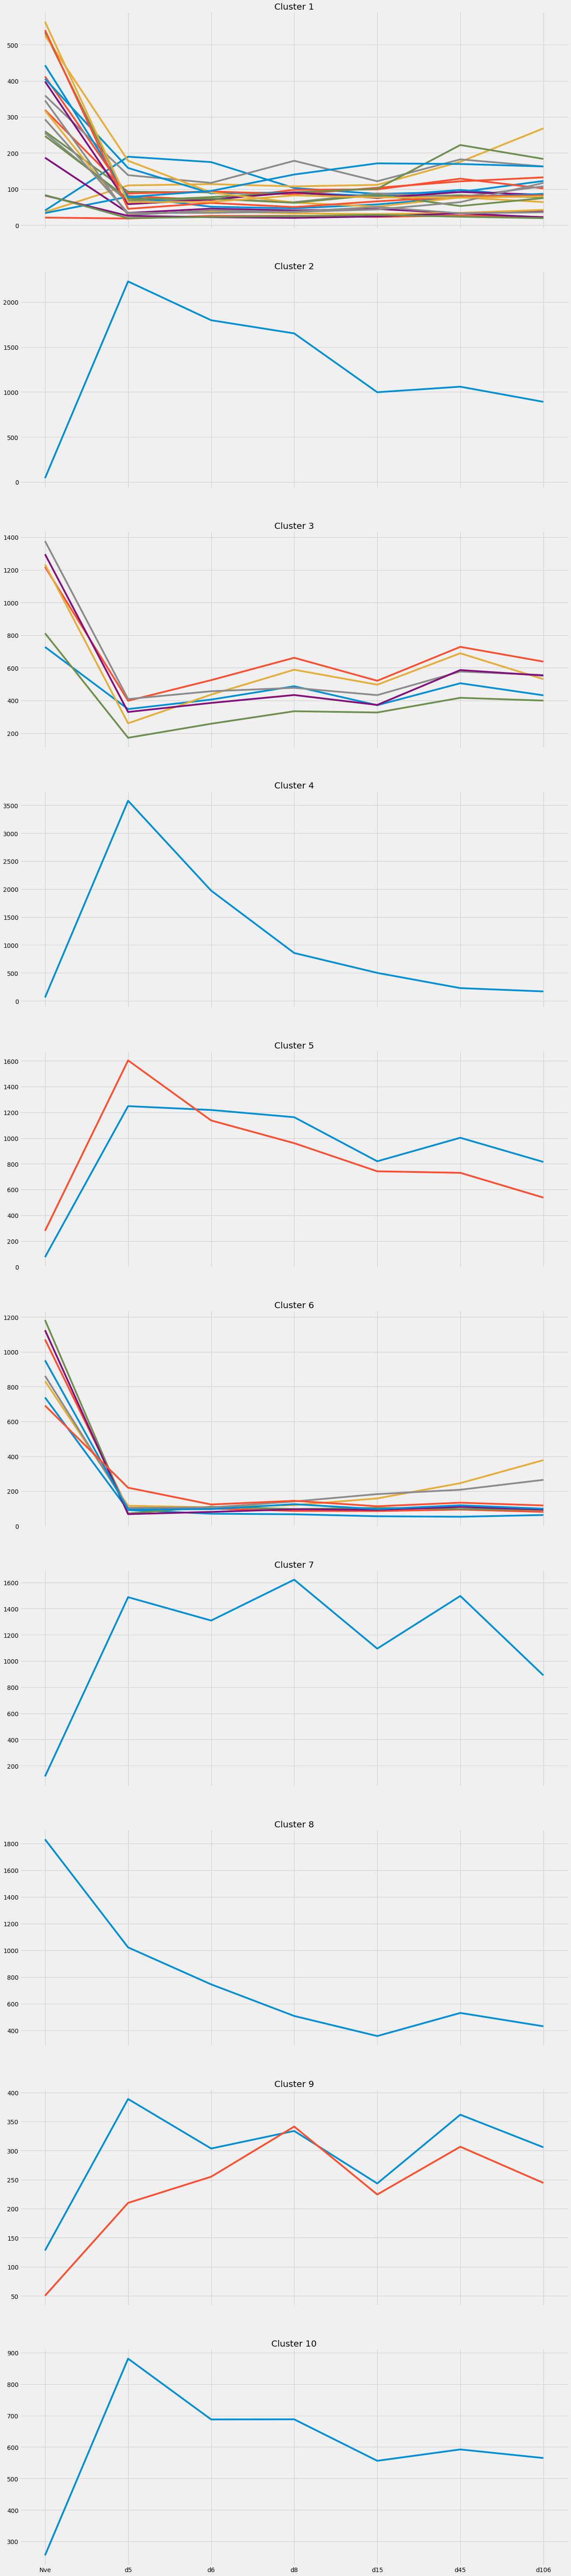

In [14]:
# Answer here:

fig, ax = plt.subplots(10, sharex=True, figsize=(20, 100))

for i in range(0, 10):
    '''Answer: Fill in the rest of this code'''
    cluster = ...
    
    # Graphing a line for each gene is tricky. To do this, we will be converting our data to a matrix, 
    # then using matplotlib. 'T' transposes our data.
    x=cluster.to_df().as_matrix().T
    
    # Plot each gene using matplotlib.
    ax[i].plot(x)
    ax[i].set_title("Cluster %i" % (i+1))
    ax[i].set_xticklabels(labels)

<h2 style="color:red">** Question 6**</h2> 
What are some trends you can see between and across gene clusters over time?

**Answer here:**


<h2 style="color:red">** Question 7**</h2> 
List all of the genes in each of the categories. (Hint: We printed out the labels for each gene above. This is stored in the **kmeans_labels** array. Join this with the Gene names, and print the gene names in each cluster.

In [ ]:
# Answer here:


<h2 style="color:red">** Question 8**</h2> 

Which clusters have the most genes in them? Which cluster have the fewest genes in them?

**Answer here:**

<h2 style="color:red">** Question 9**</h2> 
Open https://www.immgen.org/ImmGenPublications/ni.2536.pdf. This paper contains the original clustering experiments of this gene set. In Figure 1c, you can see their 10 clusters. Read the genes in each of these clusters. Which of your clusters correspond to the clusters they found in the paper (ie Cluster 1 from paper -> my cluster 2). If unsure of specific, you can put 2 clusters.

**Answer here:**

<h2 style="color:red">** Question 10**</h2> 
It seems like our clusting results differ from those in the paper. What are some potential sources that are creating these differences?

**Answer here:**

<h2 style="color:red">** Question 11**</h2> 

Pick one of the 10 clusters defined in the paper. Give a description of the category from the paper and explain one of its genes. 


**Answer here:**


<h2 style="color:red">** Question 12**</h2> 
On a scale from 1 to 10 (1 being worst, 10 being best), please rate this lab in terms of its:
1. Clarity
2. Difficulty
3. Length
4. Insight

**Answer here:**